In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from LinearRegression import LinearRegression

In [16]:
data_path = Path.cwd()
df = pd.read_csv(data_path / 'insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Prepare data

In [17]:
# binarize sex to -1 for male and 1 for women
df.loc[df['sex']=='male', 'sex']=-1
df.loc[df['sex']=='female', 'sex']=1

# binarize smoker to -1 for yes and 1 for no
df.loc[df['smoker']=='yes', 'smoker']=-1
df.loc[df['smoker']=='no', 'smoker']=1

# Remove region
if 'region' in df.columns:
    df = df.drop(['region'], axis=1)
df.head(10)

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,-1,16884.92400
1,18,-1,33.770,1,1,1725.55230
2,28,-1,33.000,3,1,4449.46200
3,33,-1,22.705,0,1,21984.47061
4,32,-1,28.880,0,1,3866.85520
5,31,1,25.740,0,1,3756.62160
6,46,1,33.440,1,1,8240.58960
7,37,1,27.740,3,1,7281.50560
8,37,-1,29.830,2,1,6406.41070
9,60,1,25.840,0,1,28923.13692


# Linear Regression

In [18]:
# Choose features to predict
features = np.array(['age', 'sex', 'bmi', 'children', 'smoker'])
X, y = df[features].to_numpy(), df[['charges']].to_numpy()

In [25]:
model = LinearRegression(X=X, y_gt=y, alpha=0.0001, eps=1e-5)

In [26]:
model.fit()


--- Itération 0 ---
MSE = 1.6109845E+08

--- Itération 1000 ---
MSE = 5.9493411E+07

--- Itération 2000 ---
MSE = 5.4361062E+07

--- Itération 3000 ---
MSE = 4.9876456E+07

--- Itération 4000 ---
MSE = 4.5956370E+07

--- Itération 5000 ---
MSE = 4.2528557E+07

--- Itération 6000 ---
MSE = 3.9530244E+07

--- Itération 7000 ---
MSE = 3.6906847E+07

--- Itération 8000 ---
MSE = 3.4610864E+07

--- Itération 9000 ---
MSE = 3.2600932E+07

--- Itération 10000 ---
MSE = 3.0841007E+07

--- Itération 11000 ---
MSE = 2.9299665E+07

--- Itération 12000 ---
MSE = 2.7949491E+07

--- Itération 13000 ---
MSE = 2.6766562E+07

--- Itération 14000 ---
MSE = 2.5729986E+07

--- Itération 15000 ---
MSE = 2.4821514E+07

--- Itération 16000 ---
MSE = 2.4025201E+07

--- Itération 17000 ---
MSE = 2.3327107E+07

--- Itération 18000 ---
MSE = 2.2715040E+07

--- Itération 19000 ---
MSE = 2.2178338E+07

--- Itération 20000 ---
MSE = 2.1707671E+07

--- Itération 21000 ---
MSE = 2.1294873E+07

--- Itération 22000 --

0.7289415230010479


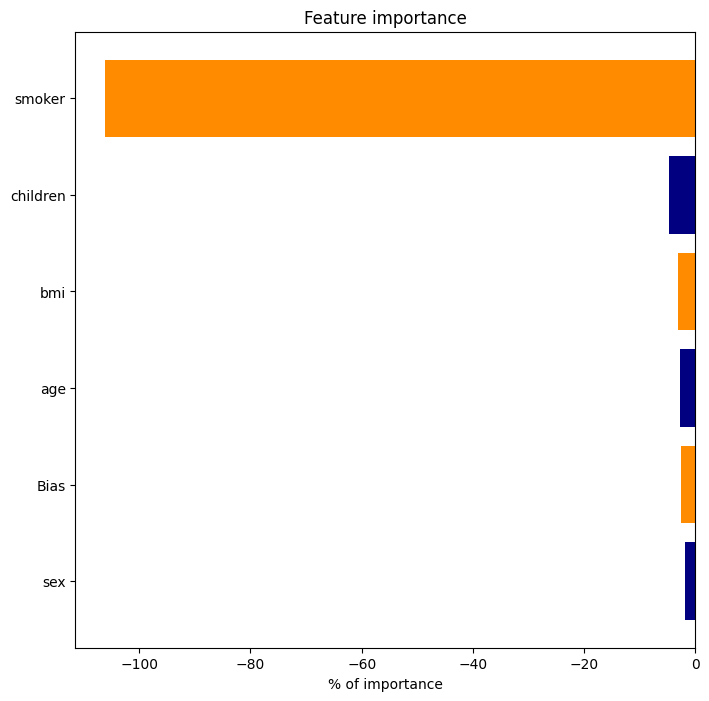

In [27]:
print(model.score())
model.plot_featureimportance(names=features)

In [48]:
def plot_mse(y_pred, y_gt, threshold=0):
    error = np.abs(y_pred-y_gt)

    plt.figure(figsize=(30,10))
    plt.stem(error, linefmt='navy')
    plt.hlines(threshold, 0, y_pred.shape[0], lw=2, ls=':', color='darkorange')
    plt.ylabel('|y_pred-y_gt|')
    plt.show()

In [49]:
y_pred = model.predict()

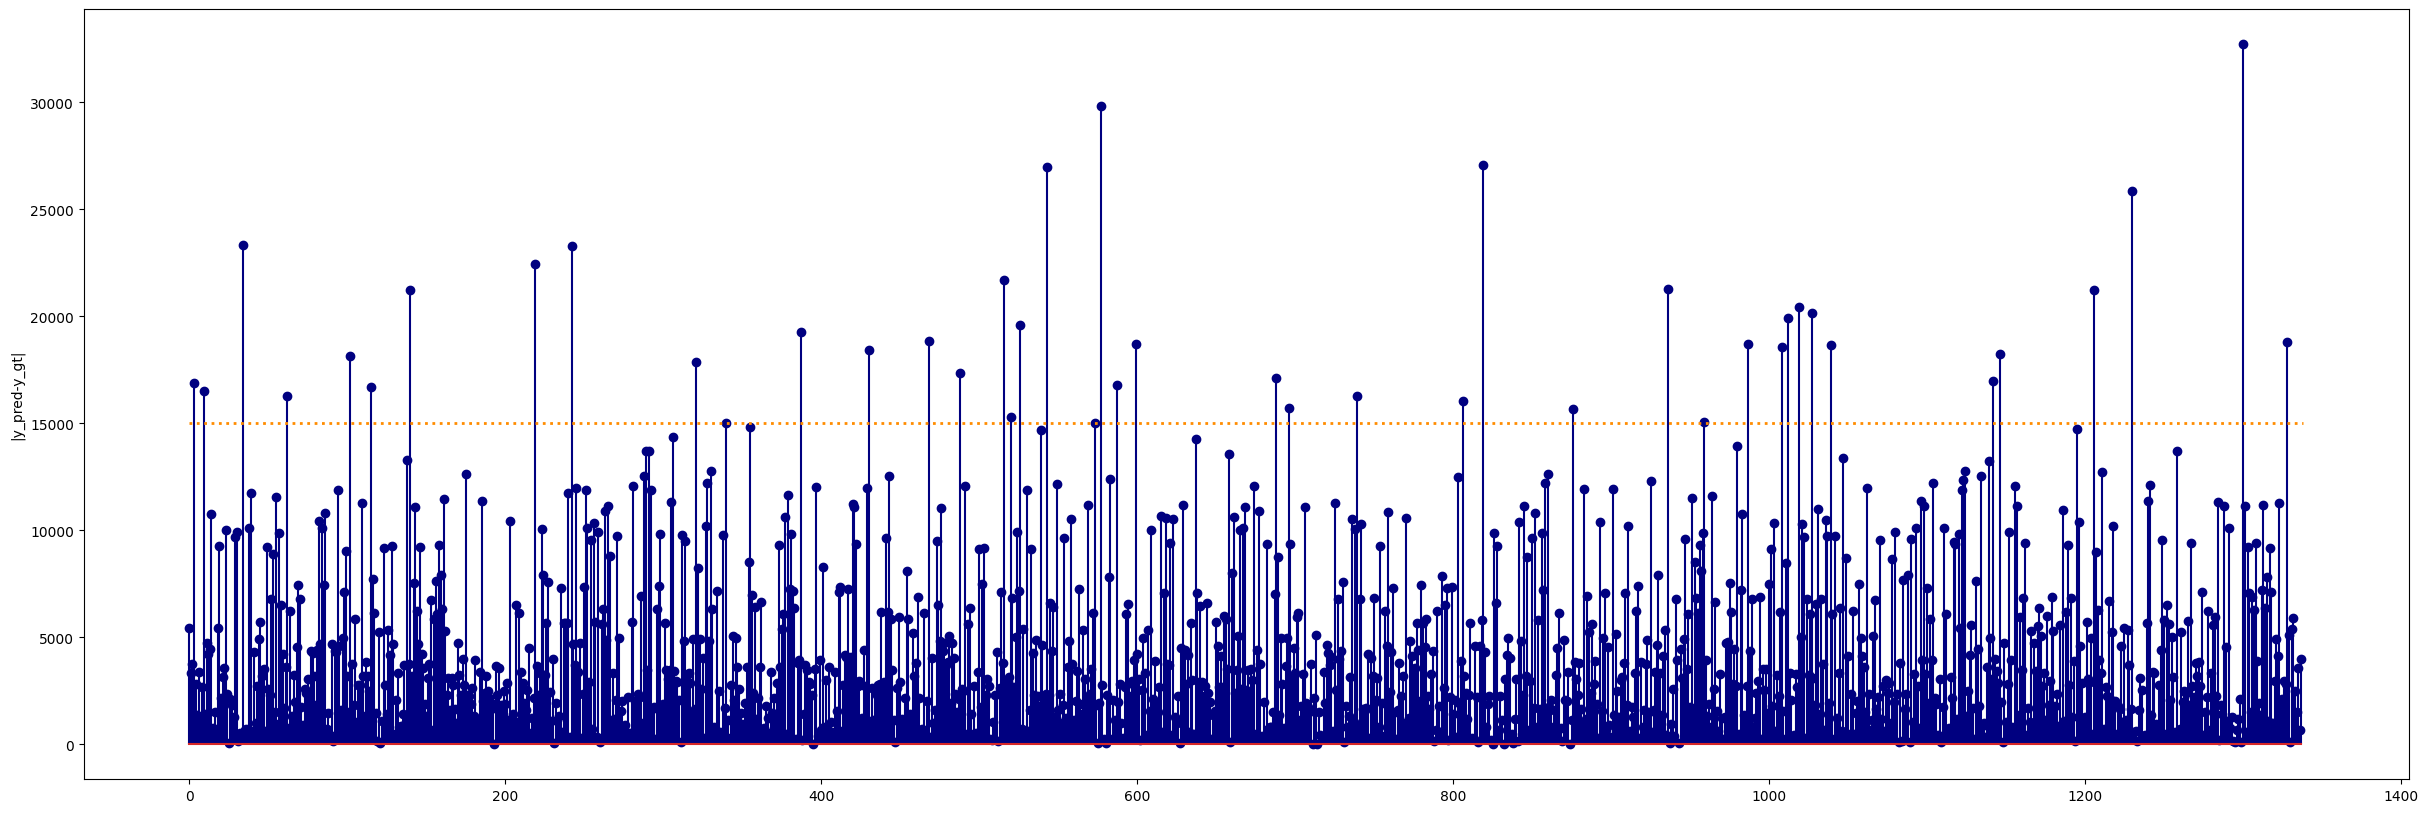

In [50]:
plot_mse(y_pred, y, 15000)

In [ ]:
def cost